In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import re

from wordcloud import WordCloud
import spacy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.svm import LinearSVC

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, LSTM, Dense, SpatialDropout1D, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam

In [5]:
df = pd.read_csv(r'C:\Users\18456\Desktop\train.csv')

In [6]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
df.shape

(7613, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


## Text Extraction and Feature Engineering using KGP Talkie

In [9]:
import preprocess_kgptalkie as kgp

In [10]:
tweet = kgp.get_basic_features(df)

In [11]:
tweet.head(10)

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,0
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,93,18,5.166667,4,3,0,2,0
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,82,14,5.857143,2,2,0,1,0
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,45,15,3.000000,10,0,0,1,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,68,12,5.666667,6,0,0,0,0
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,43,10,4.300000,5,0,0,1,0


In [12]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ').replace('.', ' ')
    x = kgp.cont_exp(x)
    x = kgp.remove_emails(x)
    x = kgp.remove_urls(x)
    x = kgp.remove_html_tags(x)
    x = kgp.remove_rt(x)
    x = kgp.remove_accented_chars(x)
    x = kgp.remove_special_chars(x)
    x = kgp.remove_dups_char(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [13]:
tweet['text'] = tweet['text'].apply(lambda x: get_clean(x))

C:\Users\18456\Desktop\Twitter Disaster Relief\distilbert\venv\Lib\site-packages\preprocess_kgptalkie\utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


In [14]:
tweet.head(10)['text']

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    130 people receive wildfires evacuation orders...
4    just got sent this photo from ruby alaska as s...
5    rockyfire update california hwy 20 closed in b...
6    flood disaster heavy rain causes flash floodin...
7    i am on top of the hill and i can see a fire i...
8    there is an emergency evacuation happening now...
9    i am afraid that the tornado is coming to our ...
Name: text, dtype: object

In [15]:
kgp.get_ngram(tweet, 'text', ngram_range=2)

[('zxathetis are', 67862),
 ('zurich for', 67861),
 ('zumiez is', 67860),
 ('zss vs', 67859),
 ('zourryart forgot', 67858),
 ('zouma just', 67857),
 ('zouma has', 67856),
 ('zotar50 skeleton', 67855),
 ('zoom in', 67854),
 ('zonewolf123 liked', 67853),
 ('zonesthank god', 67852),
 ('zones donuat', 67851),
 ('zone with', 67850),
 ('zone what', 67849),
 ('zone war', 67848),
 ('zone they', 67847),
 ('zone protectdenaliwolves', 67846),
 ('zone outside', 67845),
 ('zone of', 67844),
 ('zone my', 67843),
 ('zone littlewomenla', 67842),
 ('zone laugh', 67841),
 ('zone johnny', 67840),
 ('zone in', 67839),
 ('zone httpt', 67838),
 ('zone during', 67837),
 ('zone common', 67836),
 ('zone coming', 67835),
 ('zone but', 67834),
 ('zone and', 67833),
 ('zone amirite', 67832),
 ('zombies take', 67831),
 ('zombie fun', 67830),
 ('zombie feel', 67829),
 ('zombie apocalypse', 67828),
 ('zomatoaus lovefood', 67827),
 ('zojadelin you', 67826),
 ('zodiac girl', 67825),
 ('ziuw httpt', 67824),
 ('zippolin

In [16]:
# save cleaned dataset
train_clean = tweet.to_csv(r'C:\Users\18456\Desktop\Twitter Disaster Relief\Data\train_clean.csv')

## Explatory Data Analysis

In [17]:
plt.rcParams['figure.figsize'] = [9,5]
plt.rcParams['figure.dpi'] = 80

In [18]:
tweet['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

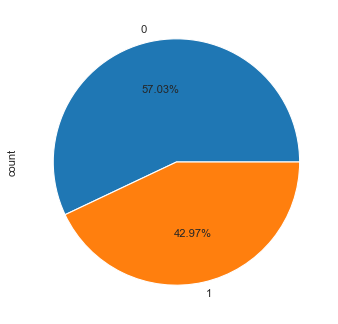

In [19]:
tweet['target'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

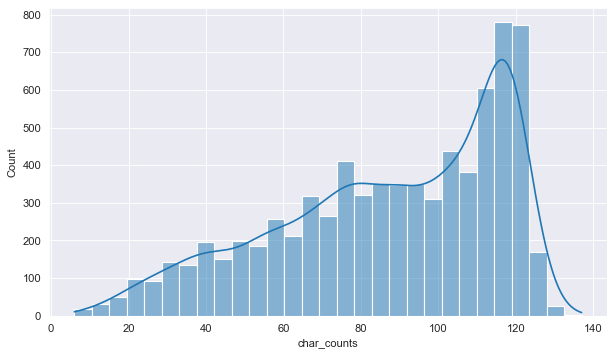

In [20]:
sns.histplot(tweet['char_counts'], kde= True)
plt.show()

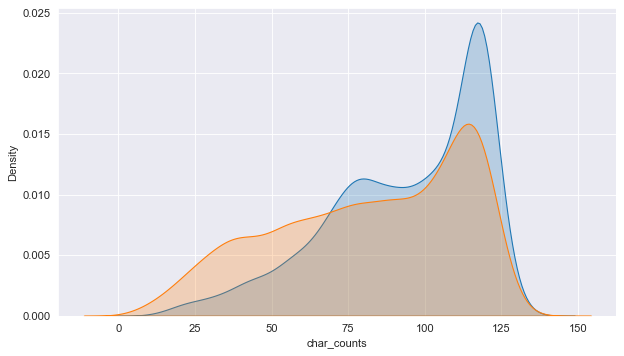

In [21]:
sns.kdeplot(tweet[tweet['target']==1]['char_counts'], fill=True)
sns.kdeplot(tweet[tweet['target']==0]['char_counts'], fill=True)
plt.show()

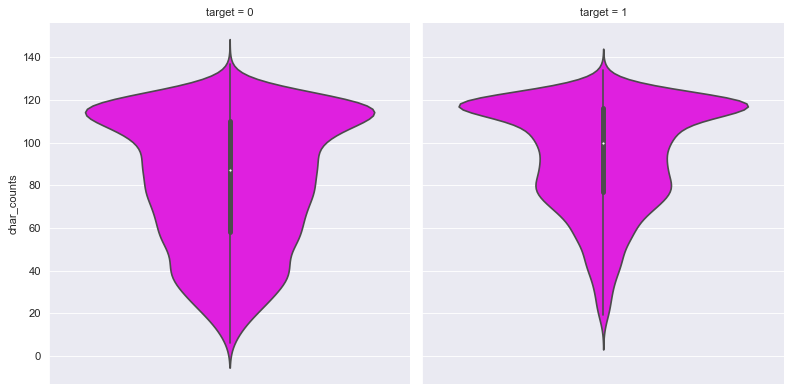

In [22]:
sns.catplot(y='char_counts', data= tweet, col='target',kind='violin', color= 'magenta')
plt.show()

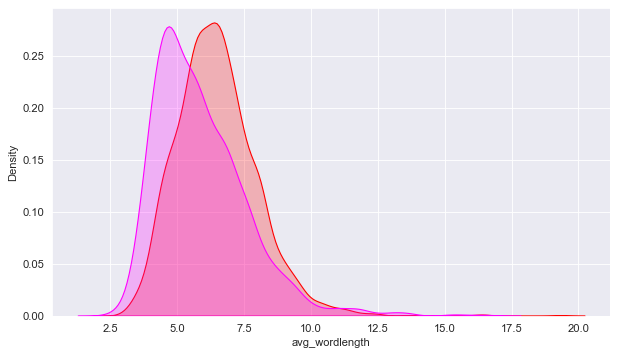

In [23]:
plt.show()
sns.kdeplot(tweet[tweet['target'] == 1]['avg_wordlength'], fill=True, color='red')
sns.kdeplot(tweet[tweet['target'] == 0]['avg_wordlength'], fill=True, color='magenta')
plt.show()

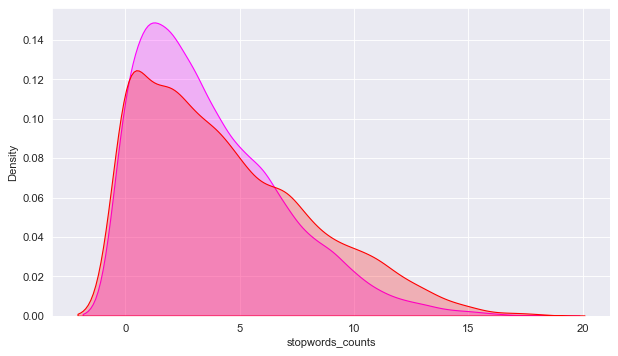

In [24]:
sns.kdeplot(tweet[tweet['target']==1]['stopwords_counts'], fill= True, color= 'magenta')
sns.kdeplot(tweet[tweet['target']==0]['stopwords_counts'], fill= True, color= 'red')
plt.show()

In [25]:
frequencies = kgp.get_word_freqs(tweet, 'text')

In [26]:
top20 = frequencies[100:120]
top20

first      107
day        107
going      103
see        103
world      103
bomb       102
did        101
nuclear    101
love       100
fires      100
attack     100
our        100
cannot      99
two         97
youtube     97
go          96
killed      96
dead        95
today       95
their       94
Name: count, dtype: int64

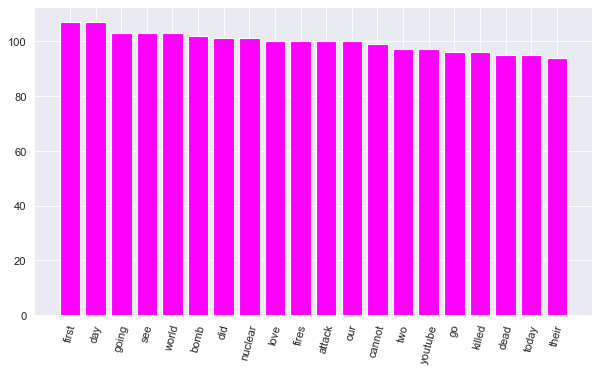

In [27]:
plt.bar(top20.index,top20.values,color ='magenta')
plt.xticks(rotation=75)
plt.show()

In [28]:
least20 =frequencies[-20:]
least20

browsers           1
machines           1
nonexistant        1
photogenic         1
uhoax              1
recipe             1
deviceua           1
ataecinema         1
co5ng0fzpvds       1
co94sxki7kvx       1
armenians          1
positively         1
violentfeminazi    1
nuys               1
530pm              1
cofxux987vzx       1
vannuyscouncil     1
youssefyamani      1
equation           1
coymy4rskq3d       1
Name: count, dtype: int64

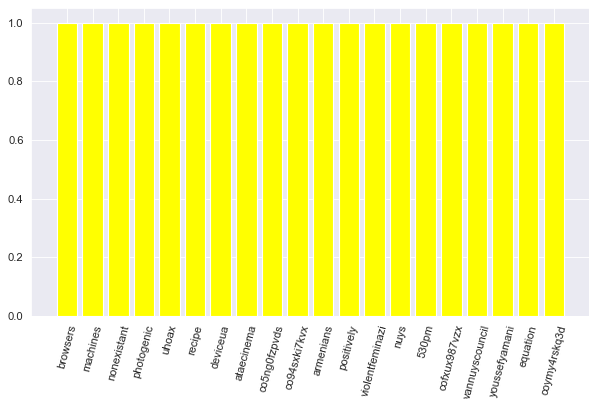

In [29]:
plt.bar(least20.index,least20.values,color= 'yellow')
plt.xticks(rotation=75)
plt.show()

In [30]:
bigram = kgp.get_ngram(tweet, 'text', ngram_range=2)
bigram[:20]

[('zxathetis are', 67862),
 ('zurich for', 67861),
 ('zumiez is', 67860),
 ('zss vs', 67859),
 ('zourryart forgot', 67858),
 ('zouma just', 67857),
 ('zouma has', 67856),
 ('zotar50 skeleton', 67855),
 ('zoom in', 67854),
 ('zonewolf123 liked', 67853),
 ('zonesthank god', 67852),
 ('zones donuat', 67851),
 ('zone with', 67850),
 ('zone what', 67849),
 ('zone war', 67848),
 ('zone they', 67847),
 ('zone protectdenaliwolves', 67846),
 ('zone outside', 67845),
 ('zone of', 67844),
 ('zone my', 67843)]

## Visualization with Word Cloud


In [31]:
real_tweets = kgp.get_word_freqs(tweet[tweet['target']==1],'text')
real_tweets = ' '.join(real_tweets.index)
real_tweets

'httpt the in of a to and is on for i at by from it that with not you after this fire are was as have my news httpst over up more via disaster an were be people california suicide has no police who but when been killed like do 2 will just hiroshima than so out fires storm crash families we train now about into emergency s your buildings bomb there all what two mh370 attack am nuclear they wildfire video accident get new one bombing how prime minister northern burning legionnaires dead me bomber homes some if car war still atomic obama he fatal years off may us collapse forest retweet city watch debris malaysia first today 1 japan or man latest mass severe near water had earthquake before those confirmed found oil would down 70 spill floods army world home under warning 4 could injured wreckage weather derailment outbreak 3 evacuation being saudi thunderstorm migrants 40 our old flood missing flooding can during say investigators their time bridge back mosque death suspect state her cha

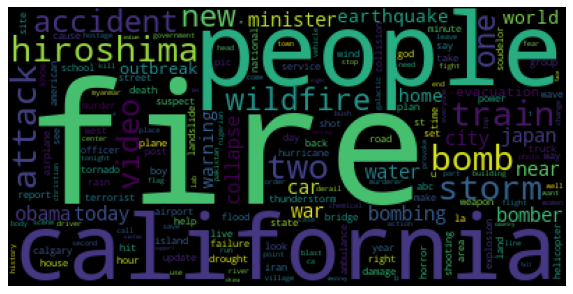

In [32]:
word_cloud = WordCloud(max_font_size=120).generate(real_tweets)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [33]:
not_real_tweets = kgp.get_word_freqs(tweet[tweet['target']==0],'text')
not_real_tweets = ' '.join(not_real_tweets.index)
not_real_tweets

'the httpt i a to and of is in you my it for not on that with this have be am httpst are do me out your like so by at just was but will up all he if from new as get they has or we no when now about what would an how one can there body people 2 via been her his into video more loud us know love back time why got off emergency them full see after who day 3 going cannot youtube did still some fire let good go she think laughing want had man our should ass retweet world over then way life their first youre work too last burning only make really need than news god because best much even being here many content take help could right 5 say wreck him were black feel great today its please hot look im fucking never every 4 1 down fear cross bags before read ever oh fuck does top night reddit come without bag these getting another any everyone year shit death panic screaming liked head ruin may bloody wrecked u always smoke bad most explode w school face well buildings harm disaster crash coming

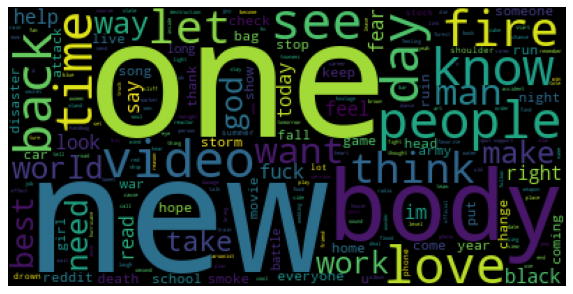

In [34]:
word_cloud = WordCloud(max_font_size=120).generate(not_real_tweets)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

## Machine Learning Classification with TF-IDF and Support Vector Machine(SVM)

In [35]:
text = tweet['text']
y = tweet['target']

tfidf = TfidfVectorizer()
x = tfidf.fit_transform(text)

In [36]:
x.shape

(7613, 22546)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
def run_svm(clf, x_train, x_test, y_train, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    print()
    print('Classification Report')
    print(classification_report(y_test,y_pred, labels=None))

In [39]:
clf = LinearSVC()
run_svm(clf, x_train, x_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       869
           1       0.82      0.72      0.77       654

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523



##  Machine Learning Classification with Word2Vec and SVM

In [40]:
nlp = spacy.load('en_core_web_lg')

In [41]:
x = 'twitter disaster relief'
doc = nlp(x)
doc.vector.shape

(300,)

In [42]:
def get_vec(x):
    doc = nlp(x)
    vec = doc.vector
    return vec

In [43]:
tweet['vec'] = tweet['text'].apply(lambda x: get_vec(x))

In [44]:
x = tweet['vec'].to_numpy().reshape(-1,1)
x.shape

(7613, 1)

In [45]:
x = np.concatenate(np.concatenate(x, axis=0), axis=0).reshape(-1,300)

In [46]:
x.shape

(7613, 300)

In [47]:
y = tweet['target']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32, stratify=y)

In [49]:
clf = LinearSVC()
run_svm(clf,x_train,x_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.76      0.90      0.83       869
           1       0.83      0.62      0.71       654

    accuracy                           0.78      1523
   macro avg       0.79      0.76      0.77      1523
weighted avg       0.79      0.78      0.78      1523



C:\Users\18456\Desktop\Twitter Disaster Relief\distilbert\venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Classifcation with Word Embeddings and Deep Learning

In [50]:
text

0       our deeds are the reason of this earthquake ma...
1                   forest fire near la ronge sask canada
2       all residents asked to shelter in place are be...
3       130 people receive wildfires evacuation orders...
4       just got sent this photo from ruby alaska as s...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    aria ahrary thetawniest the out of control wil...
7610    m1 94 0104 coordinated universal time5km s of ...
7611    police investigating after an ebike collided w...
7612    the latest more homes razed by northern califo...
Name: text, Length: 7613, dtype: object

In [51]:
token = Tokenizer()
token.fit_on_texts(text)

In [52]:
vocab_size = len(token.word_index) + 1
vocab_size

22582

In [53]:
print(token.word_index)

{'httpt': 1, 'the': 2, 'a': 3, 'in': 4, 'to': 5, 'of': 6, 'i': 7, 'and': 8, 'is': 9, 'you': 10, 'for': 11, 'on': 12, 'it': 13, 'my': 14, 'not': 15, 'that': 16, 'with': 17, 'at': 18, 'by': 19, 'this': 20, 'have': 21, 'are': 22, 'from': 23, 'be': 24, 'was': 25, 'httpst': 26, 'do': 27, 'like': 28, 'as': 29, 'out': 30, 'am': 31, 'so': 32, 'your': 33, 'up': 34, 'me': 35, 'just': 36, 'but': 37, 'will': 38, 'after': 39, 'has': 40, 'all': 41, 'no': 42, 'fire': 43, 'an': 44, 'when': 45, 'if': 46, 'he': 47, 'new': 48, 'we': 49, 'get': 50, 'they': 51, 'now': 52, 'about': 53, 'via': 54, 'more': 55, 'people': 56, 'what': 57, 'or': 58, 'how': 59, 'one': 60, 'been': 61, 'there': 62, '2': 63, 'over': 64, 'news': 65, 'would': 66, 'who': 67, 'into': 68, 'were': 69, 'video': 70, 'can': 71, 'emergency': 72, 'disaster': 73, 'us': 74, 'police': 75, 'than': 76, 'off': 77, 'her': 78, 'some': 79, 'still': 80, 'his': 81, 'body': 82, 'back': 83, 'time': 84, 'burning': 85, 'california': 86, 'crash': 87, 'know': 8

In [54]:
embedded_text = token.texts_to_sequences(text)

In [55]:
print(embedded_text)

[[109, 4491, 22, 2, 868, 6, 20, 246, 129, 1681, 4492, 74, 41], [186, 43, 223, 763, 6792, 6793, 1328], [41, 1682, 1435, 5, 2062, 4, 655, 22, 125, 6794, 19, 1683, 42, 438, 253, 58, 2062, 4, 655, 1329, 22, 1054], [2809, 56, 4493, 1330, 253, 1329, 4, 86], [36, 93, 1159, 20, 314, 23, 6795, 2063, 29, 261, 23, 1330, 6796, 68, 3, 189], [2810, 391, 86, 1554, 793, 829, 4, 637, 6797, 534, 5, 1106, 371, 43, 4494, 1330], [224, 73, 830, 282, 1160, 831, 247, 6, 1862, 4, 6798, 999, 2344, 1555], [7, 31, 12, 225, 6, 2, 1863, 8, 7, 71, 103, 3, 43, 4, 2, 4495], [62, 9, 44, 72, 253, 1237, 52, 4, 2, 585, 832, 2, 703], [7, 31, 2345, 16, 2, 489, 9, 240, 5, 109, 354], [586, 56, 611, 23, 2, 283, 467, 32, 612], [833, 613, 2811, 9, 217, 2812, 3467, 656, 3, 657, 7, 199, 4, 613, 2811, 57, 31, 7, 301, 27, 57, 31, 7, 301, 27, 6799, 247], [2813, 247, 2064, 6800, 2811, 1436, 58, 1864, 614, 7, 21, 735, 3468], [224, 4, 4496, 912, 49, 1684, 4496], [241, 5, 189, 392, 12, 2346, 4, 4497, 126, 87, 355], [638, 34, 96], [7, 110

In [56]:
max_length = 40
x = pad_sequences(embedded_text, maxlen= max_length, padding='post')
print(x)

[[ 109 4491   22 ...    0    0    0]
 [ 186   43  223 ...    0    0    0]
 [  41 1682 1435 ...    0    0    0]
 ...
 [2709 2295 4483 ...    0    0    0]
 [  75 1092   39 ...    0    0    0]
 [   2  206   55 ...    0    0    0]]


In [57]:
x.shape

(7613, 40)

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17, stratify=y)

In [59]:
vec_size = 100

model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_length))

model.add((Conv1D(32, 2, activation='relu')))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))

model.add(GlobalMaxPooling1D())

model.add(Dense(1, activation='sigmoid'))

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 100)           2258200   
                                                                 
 conv1d (Conv1D)             (None, 39, 32)            6432      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 19, 32)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 32)            0         
                                                                 
 dense (Dense)               (None, 19, 32)            1056      
                                                                 
 dropout_1 (Dropout)         (None, 19, 32)            0         
                                                        

In [61]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train, epochs= 10, validation_data=(x_test,y_test))

Epoch 1/10
191/191 [==============================] - 10s 46ms/step - loss: 0.6652 - accuracy: 0.5934 - val_loss: 0.6181 - val_accuracy: 0.7019
Epoch 2/10
191/191 [==============================] - 9s 45ms/step - loss: 0.5077 - accuracy: 0.7750 - val_loss: 0.5037 - val_accuracy: 0.7656
Epoch 3/10
191/191 [==============================] - 9s 45ms/step - loss: 0.3522 - accuracy: 0.8580 - val_loss: 0.4985 - val_accuracy: 0.7636
Epoch 4/10
191/191 [==============================] - 9s 45ms/step - loss: 0.2286 - accuracy: 0.9169 - val_loss: 0.5438 - val_accuracy: 0.7505
Epoch 5/10
191/191 [==============================] - 9s 47ms/step - loss: 0.1378 - accuracy: 0.9494 - val_loss: 0.6063 - val_accuracy: 0.7334
Epoch 6/10
191/191 [==============================] - 9s 47ms/step - loss: 0.0912 - accuracy: 0.9691 - val_loss: 0.6443 - val_accuracy: 0.7472
Epoch 7/10
191/191 [==============================] - 9s 47ms/step - loss: 0.0622 - accuracy: 0.9801 - val_loss: 0.6925 - val_accuracy: 0.733

In [62]:
def get_embedded(x):
 x = get_clean(x)
 x = token.texts_to_sequences([x])
 x = pad_sequences(x, maxlen= max_length, padding = 'post')
 return(x)

In [63]:
x = 'i am really excited and scared to see @ this'
vec = get_embedded(x)

In [64]:
vec

array([[   7,   31,  173, 3107,    8,  966,    5,  103,   20,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0]])

In [65]:
np.argmax(model.predict(vec), axis= -1)

1/1 [==============================] - 0s 224ms/step


array([0], dtype=int64)

## Deep learning with DistilBert

In [66]:
import ktrain
from ktrain import text

In [67]:
tweet.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,vec
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,57,13,4.384615,6,1,0,0,1,"[-0.8476947, 0.8888447, -3.10391, 0.090650745,..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,32,7,4.571429,0,0,0,1,0,"[-0.35491997, -1.5415528, -2.0926642, -0.49523..."
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,112,22,5.090909,9,0,0,1,0,"[-2.8959212, 0.6998072, -2.5640087, 1.2561336,..."
3,6,NaN,NaN,130 people receive wildfires evacuation orders...,1,57,8,7.125000,1,1,0,1,0,"[-2.3889112, -0.6061475, -2.453201, 1.5150287,..."
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,72,16,4.500000,6,2,0,0,0,"[-0.8628482, -0.2587669, -2.5594664, 0.3031685..."


In [68]:
text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


In [69]:
train, val, preproc = text.texts_from_df(train_df= tweet, text_column='text', label_columns='target', val_df= None , maxlen= 40 , preprocess_mode= 'distilbert')

['not_target', 'target']
      not_target  target
7165         0.0     1.0
77           0.0     1.0
6092         1.0     0.0
1751         0.0     1.0
5531         1.0     0.0
['not_target', 'target']
      not_target  target
2273         1.0     0.0
2444         0.0     1.0
519          1.0     0.0
3967         0.0     1.0
16           1.0     0.0
preprocessing train...
language: en
train sequence lengths:
	mean : 16
	95percentile : 25
	99percentile : 28


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 15
	95percentile : 25
	99percentile : 28


In [70]:
DistilBert_model = text.text_classifier(name = 'distilbert', train_data= train, preproc= preproc)

Is Multi-Label? False
maxlen is 40
done.


In [71]:
learner = ktrain.get_learner(model = DistilBert_model, train_data= train, val_data= val, batch_size= 6)
learner.fit_onecycle(lr= 2e-5, epochs= 4)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/4
1142/1142 [==============================] - 1188s 1s/step - loss: 0.4778 - accuracy: 0.7761 - val_loss: 0.4014 - val_accuracy: 0.8281
Epoch 2/4
1142/1142 [==============================] - 1175s 1s/step - loss: 0.3611 - accuracy: 0.8537 - val_loss: 0.4251 - val_accuracy: 0.8241
Epoch 3/4
1142/1142 [==============================] - 1177s 1s/step - loss: 0.2637 - accuracy: 0.9005 - val_loss: 0.4596 - val_accuracy: 0.8281
Epoch 4/4
1142/1142 [==============================] - 1179s 1s/step - loss: 0.1516 - accuracy: 0.9454 - val_loss: 0.5424 - val_accuracy: 0.8136


In [79]:
#Save the model
model.save('DistilBert_model.h5')

# Data Prediction using DistilBert Model

In [73]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [81]:
predictor.save(r'C:\Users\18456\Desktop\Twitter Disaster Relief\distilbert')

In [74]:
data = ['oh my god i ran into you by accident', 'i got into car crash and i am wounded']

In [75]:
predictor.predict(data, return_proba=True)

array([[0.9130691 , 0.08693085],
       [0.12614858, 0.87385136]], dtype=float32)

In [78]:
predictor.predict(data[1])

'target'

In [76]:
classes = predictor.get_classes()

In [77]:
y_pred = predictor.predict(data[1])
classes.index(y_pred)

1